# Lab 2 - Bike Rental Data Set from UCI Machine Learning Repository

### Numan SAHNOU & Matthieu ECCHER

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv("Bike_Rental_UCI_dataset.csv")

df


,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,Mon,723,119
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,Mon,723,89
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,Mon,724,90
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,Mon,724,61


# Plots

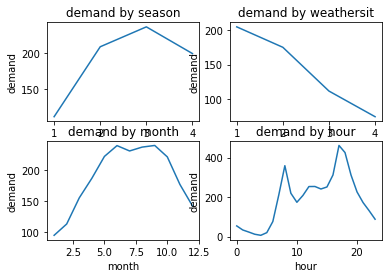

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.subplot(2, 2, 1)
gbs=df.groupby(pd.Grouper(key='season')).mean()
plt.plot(gbs['demand'])
plt.xlabel('season')
plt.ylabel('demand')
plt.title('demand by season')

plt.subplot(2, 2, 2)
gbw = df.groupby(pd.Grouper(key='weathersit')).mean()
plt.plot(gbw['demand'])
plt.xlabel('weathersit')
plt.ylabel('demand')
plt.title('demand by weathersit')

plt.subplot(2, 2, 3)
gbm= df.groupby(pd.Grouper(key='mnth')).mean()
plt.plot(gbm['demand'])
plt.xlabel('month')
plt.ylabel('demand')
plt.title('demand by month')

plt.subplot(2, 2, 4)
gbh= df.groupby(pd.Grouper(key='hr')).mean()
plt.plot(gbh['demand'])
plt.xlabel('hour')
plt.ylabel('demand')
plt.title('demand by hour')

plt.show()


# Transformation of dataset & setting Data/Time index (OPTIONAL NOT EXECUTED)

### Encoding year

In [ ]:
def transform(df):    
    for i in range (0,np.size(df.to_numpy(),0)):
        if(int(df['yr'].iloc[i]) == 0):
            df['yr'].iloc[i]=2011
  
        else:
            df['yr'].iloc[i]=2012
  
        
    return df

df_cp = df
df_cp = transform(df_cp)

/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Encoding days and definition of DateTime index

In [ ]:
def counter(df):
    count = []
    c = 1
    for i in range (0, np.size(df.to_numpy(),0)):
        if(df['mnth'].iloc[i] == df['mnth'].iloc[i-1]):
            count.append(c)
            if(df['dayOfWeek'].iloc[i] != df['dayOfWeek'].iloc[i-1]):           
                c=c+1
        else:
            count.append(1)       
            c = 1
    return count      
    
c = counter(df)


df['monthday'] = c
df_cp['Timestamp'] = df_cp.apply(lambda row: dt.datetime(row.yr, row.mnth, row.monthday, row.hr), axis=1)
df_cp['Timestamp'] = pd.to_datetime(df_cp.Timestamp)


df_cp.index = pd.DatetimeIndex(df_cp.Timestamp)
df_cp.index = pd.to_datetime(df_cp.index)

df_cp.drop(['yr', 'mnth', 'monthday', 'hr', 'days', 'Timestamp'], axis='columns', inplace=True)


df_cp

,season,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,demand
Timestamp,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.81,0.0000,Sat,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.80,0.0000,Sat,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.80,0.0000,Sat,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.75,0.0000,Sat,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.75,0.0000,Sat,1
...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,0.26,0.60,0.1642,Mon,119
2012-12-31 20:00:00,1,0,1,2,0.26,0.60,0.1642,Mon,89
2012-12-31 21:00:00,1,0,1,1,0.26,0.60,0.1642,Mon,90


### Test (Optional)

In [ ]:
def coefdir_prevhour(df):
    coef=[]
    prev=[]


    for i in range (0, np.size(df.to_numpy(),0)):

        if(i>=2):
            prev.append(df['demand'].iloc[i-1])
            coef.append((df['demand'].iloc[i-2]-df['demand'].iloc[i-1])/((i-2)-(i-1)))
            #coef.append(df['days'].iloc[i])

    df=df[2:]
    df['coef']=coef
    df['prev']=prev
    return df


df_test=coefdir_prevhour(df)
df_test

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand,coef,prev
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,32,24.0,40
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,13,-8.0,32
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,0,1,-19.0,13
5,1,0,1,5,0,0,2,0.24,0.75,0.0896,Sat,0,1,-12.0,1
6,1,0,1,6,0,0,1,0.22,0.80,0.0000,Sat,0,2,-0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,Mon,723,119,-42.0,122
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,Mon,723,89,-3.0,119
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,Mon,724,90,-30.0,89
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,Mon,724,61,1.0,90


## Correlation matrix

<AxesSubplot:>

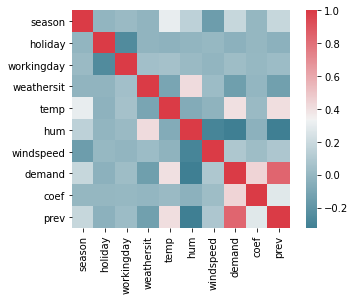

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

# Feature engeneering

### Defintion of features & labels and dummies variable

In [3]:
X = df[['mnth','yr','hr','season', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']]
y = df[['demand']]

X = pd.get_dummies(X, columns = ['season'])
X = pd.get_dummies(X, columns = ['weathersit'])

X = pd.get_dummies(X, columns = ['mnth'])
X = pd.get_dummies(X, columns = ['hr'])


X_train, X_test = train_test_split(X, test_size = 0.2, random_state=3)
y_train, y_test = train_test_split(y, test_size = 0.2, random_state=3)

X_train

,yr,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
4135,0,0,0,0.60,0.64,0.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5501,0,0,1,0.70,0.65,0.1343,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13651,1,0,0,0.74,0.62,0.1343,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5221,0,0,1,0.80,0.41,0.3881,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13953,1,0,1,0.88,0.32,0.2239,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,0,0,1,0.60,0.88,0.0896,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15288,1,0,1,0.64,0.89,0.1045,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11513,1,0,0,0.50,0.45,0.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1688,0,0,1,0.32,0.87,0.1642,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Normalization of the features 

In [4]:
def normalizeFeatures(df):
    df_norm = df.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

#X = normalizeFeatures(X)
X_train.insert (0, "intercept", np.nan)

X_train= X_train.fillna(1)

X_test.insert (0, "intercept", np.nan)

X_test= X_test.fillna(1)



In [5]:
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy()

X_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy()
m = np.size(X_train,0)
n = np.size(X_train,1)

#m = np.size(X_day,0)
#n = np.size(X_day,1)

# Creation of weight 

In [6]:
import random
def weight(df):
    w = []
    for i in range (0, len(df.axes[1])):
        w.append(random.uniform(-1000, 1000)) 
    np.array(w)
    
    return np.transpose([w])

w = weight(X_train)

# Cost Function

In [7]:
def costFunction(X, y, w):
    J = 0
    h = X.dot(w)
    J = 1/(2*m) * np.sum(np.square(h-y))
    return J

# Gradient descent

In [8]:
def gradient_descent(X, y, w, learning_rate, iterations, d):

    cost_history = []
    w_history = np.zeros((iterations,n))
    
    for i in range(iterations):
        h = np.dot(X,w)
        w = w - learning_rate * X.T.dot((h-y))
        w_history[i,:] = w.T
        cost_history.append(costFunction(X, y, w))

        print('iteration : ', i, ' | cout : ', cost_history[i], ' | difference pred-actual : ', cost_history[i-1]-cost_history[i], ' | delta condition : ', np.absolute(cost_history[i-1]-cost_history[i]) < d, ' | alpha : ', learning_rate)
        
        if (cost_history[i-1] - cost_history[i] < 0):
            learning_rate = learning_rate / 2
        elif(i > 0 and np.absolute(cost_history[i-1] - cost_history[i]) < d):
            return w, cost_history, w_history

    return w, cost_history, w_history

## Application

In [9]:
alpha = 0.001
iterations = 10000
delta = 0.0001
cost_history = []
w, cost_history, w_history = gradient_descent(X_train_numpy, y_train_numpy , w, alpha, iterations, delta)

print(w.T)
print('Final cost :', cost_history[-1])


iteration :  9013  | cout :  5214.435664871291  | difference pred-actual :  0.00043994215866405284  | delta condition :  False  | alpha :  3.125e-05
iteration :  9014  | cout :  5214.435225033084  | difference pred-actual :  0.000439838207057619  | delta condition :  False  | alpha :  3.125e-05
iteration :  9015  | cout :  5214.434785298803  | difference pred-actual :  0.0004397342809170368  | delta condition :  False  | alpha :  3.125e-05
iteration :  9016  | cout :  5214.434345668426  | difference pred-actual :  0.00043963037660432747  | delta condition :  False  | alpha :  3.125e-05
iteration :  9017  | cout :  5214.433906141926  | difference pred-actual :  0.0004395265004859539  | delta condition :  False  | alpha :  3.125e-05
iteration :  9018  | cout :  5214.433466719278  | difference pred-actual :  0.00043942264801444253  | delta condition :  False  | alpha :  3.125e-05
iteration :  9019  | cout :  5214.433027400459  | difference pred-actual :  0.00043931881918979343  | delta co

# Mean Absolute Error

## Formula

In [10]:
y_predicted = w.T.dot(X_test_numpy.T).T

y_actual = y_test.to_numpy()

In [11]:
m = np.size(X_test,0)

MAE = np.sum(np.absolute(y_actual - y_predicted)) / m

MAE

74.607764874826

# Root Mean Squared Error

In [12]:
RMSE = np.sqrt( np.sum( np.square(y_predicted - y_actual) / m ))
RMSE


100.39126153191356

# R squared

In [13]:
y_moy = np.sum(y_actual) / m
R_squared = 1 - (np.sum(np.square(y_actual - y_predicted)) / np.sum(np.square(y_actual - y_moy)))
R_squared

0.689500296338851

# Scikit Learn comparison

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_, model.intercept_)
coef = model.coef_
intercept = model.intercept_

sci_R_squared = model.score(X_test, y_test)
sci_MAE = mean_absolute_error(y_test, model.predict(X_test))
sci_RMSE =  np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print('R^2 : ', sci_R_squared)
print('MAE : ', sci_MAE)
print('RMSE : ', sci_RMSE)


[[-1.70559373e+10  8.50562528e+01 -2.79992595e+01  4.92720081e+00
   2.29421592e+02 -8.23169362e+01 -3.17019704e+01  1.92427386e+14
   1.92427386e+14  1.92427386e+14  1.92427386e+14  1.34988684e+12
   1.34988684e+12  1.34988684e+12  1.34988684e+12  9.08902986e+13
   9.08902986e+13  9.08902986e+13  9.08902986e+13  9.08902986e+13
   9.08902986e+13  9.08902986e+13  9.08902986e+13  9.08902986e+13
   9.08902986e+13  9.08902986e+13  9.08902986e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13 -3.19329953e+13
  -3.19329953e+13 -3.19329953e+13 -3.19329953e+13]] [-2.5271752e+14]
R^2 :  0.6895104109322121
MAE :  74.62382228135789
RMSE :  100.38962638533383


# Comparison 

In [15]:
d = {'From scikit learn': [sci_R_squared, sci_MAE, sci_RMSE], 'From scratch': [R_squared, MAE, RMSE]}
comparison = pd.DataFrame(data=d)
comparison['Difference'] = comparison['From scikit learn'] - comparison['From scratch']
comparison.insert (0, "Raw", ['R squared', 'MAE', 'RMSE'])
comparison.set_index('Raw')
comparison

,Raw,From scikit learn,From scratch,Difference
0,R squared,0.689510,0.689500,0.000010
1,MAE,74.623822,74.607765,0.016057
2,RMSE,100.389626,100.391262,-0.001635


### We can observe that we have really close values from scratch than from scikit learn library. 
### We can conclude that we built a good model from scratch.
### 

# Options
###  Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_ensemble = RandomForestRegressor(max_depth = 20, random_state = 0)
model_ensemble.fit(X_train, y_train)

sci_R_squared = model_ensemble.score(X_test, y_test)
sci_MAE = mean_absolute_error(y_test, model_ensemble.predict(X_test))
sci_RMSE =  np.sqrt(mean_squared_error(y_test, model_ensemble.predict(X_test)))

print('R^2 : ', sci_R_squared)
print('MAE : ', sci_MAE)
print('RMSE : ', sci_RMSE)


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
R^2 :  0.9012814306437874
MAE :  36.89041598936523
RMSE :  56.60629666407637


### Random Forest Regressor seems to be a better model for this type of Data Set as he present a better R squared and lower errors

# Normal equation

In [17]:
w_normal = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
w_normal


array([[ 9.55777241e+17],
       [-7.79881109e+02],
       [-6.50577694e+02],
       [-4.32657027e+01],
       [ 2.07285622e+04],
       [-1.41854429e+04],
       [-1.70645978e+04],
       [-1.22200287e+18],
       [-1.22200287e+18],
       [-1.22200287e+18],
       [-1.22200287e+18],
       [-5.49837888e+17],
       [-5.49837888e+17],
       [-5.49837888e+17],
       [-5.49837888e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 8.16063515e+17],
       [ 3.59430103e+03],
       [ 4.52910303e+03],
       [ 6.22854858e+03],
       [ 5.71021143e+03],
       [ 5.38260742e+03],
       [ 6.41126953e+03],
       [ 5.44429468e+03],
       [ 4.74093311e+03],
       [ 5.88907153e+03],
       [ 5.43447388e+03],
       [ 4.87498730e+03],
       [ 3.5

### Normal R Squared

In [18]:
y_normal_predicted = w_normal.T.dot(X_test_numpy.T).T

normal_R_squared = 1 - ( (np.sum(np.square(y_actual - y_normal_predicted)) / np.sum(np.square(y_actual - y_moy))) )
normal_R_squared

-313.0000710499639